## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [14]:
df = df.rename(columns={'Annual Income (k$)':'annual_income',
          'Spending Score (1-100)':'spending_score'})

In [15]:
df.head()

,CustomerID,Genre,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df['spending_score'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [18]:
df.shape

(200, 5)

In [36]:
df.isnull().sum()

CustomerID        0
Genre             0
Age               0
annual_income     0
spending_score    0
dtype: int64

## Data Viz.

<Axes: xlabel='Genre', ylabel='spending_score'>

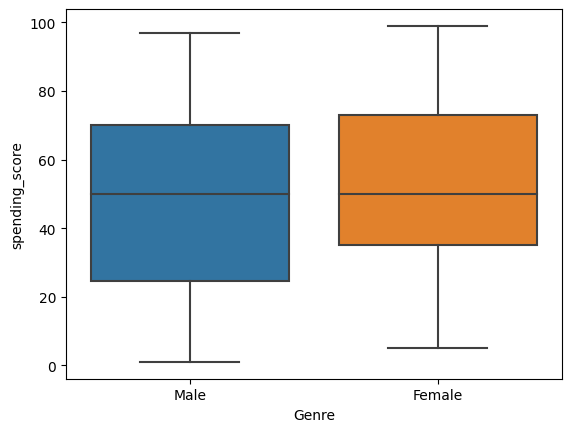

In [26]:
sns.boxplot(data = df, x = 'Genre',y = 'spending_score')

<Axes: xlabel='Age', ylabel='annual_income'>

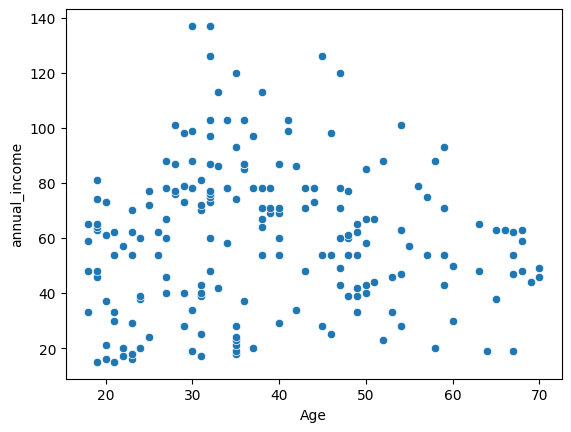

In [32]:
sns.scatterplot(data = df, x = 'Age', y = 'annual_income',)

<Axes: xlabel='Age', ylabel='annual_income'>

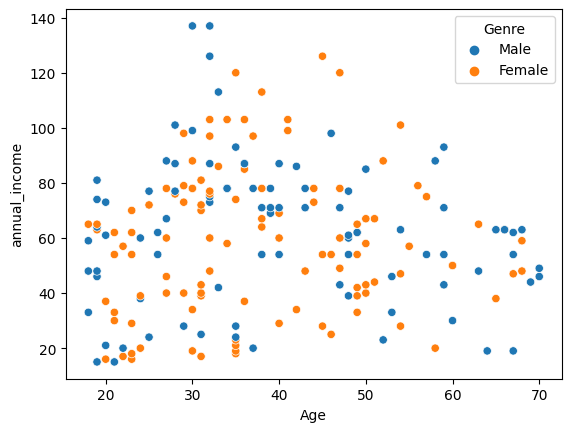

In [35]:
sns.scatterplot(data = df, x = 'Age', y = 'annual_income',hue = 'Genre')

In [39]:
X = df.iloc[:,[3,4]].values

In [40]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [41]:
from sklearn.cluster import KMeans

In [47]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)
print(len(wcss))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484346, 30259.65720728547, 25022.485004530354, 21850.165282585633, 19646.482018947238]
10


Text(0, 0.5, 'K Value')

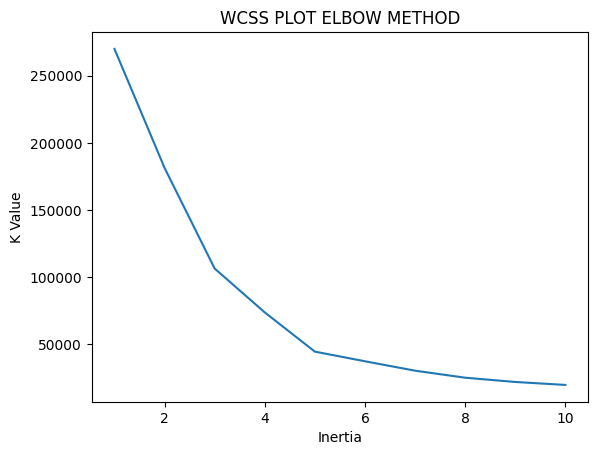

In [48]:
plt.title("WCSS PLOT ELBOW METHOD")
plt.plot(range(1,11),wcss)
plt.xlabel("Inertia")
plt.ylabel("K Value")


Best Number of clusters is 5 (Elbow point)

## Building Model 

In [50]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 101)
Y = kmeans.fit_predict(X)
print(Y) # We get cluster numbers 

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Plotting Clusters

Text(0, 0.5, 'Spending Score')

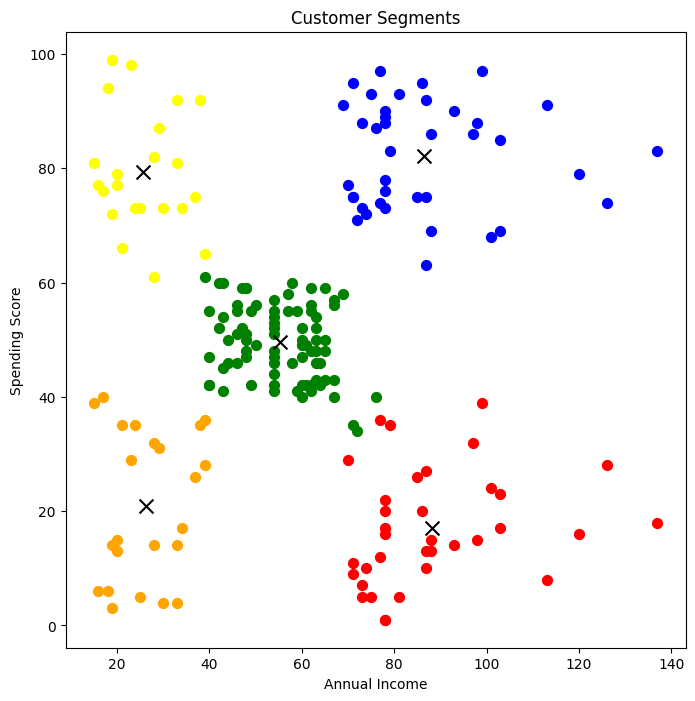

In [59]:
plt.figure(figsize= (8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='Cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label='Cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label = "Centroids",marker = 'x')
plt.title("Customer Segments")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

<Axes: xlabel='annual_income', ylabel='spending_score'>

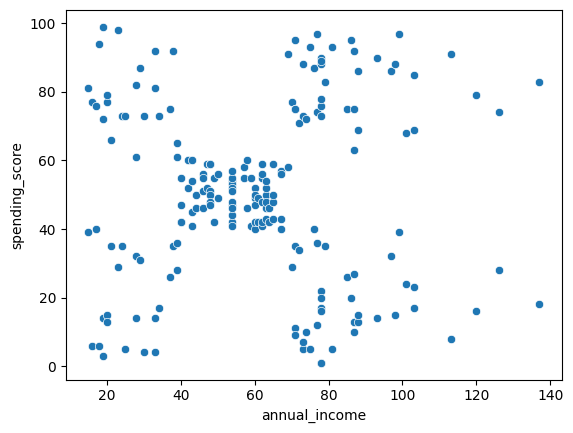

In [62]:
sns.scatterplot(df, x='annual_income',y = 'spending_score')